In [1]:
# Load the data
#test
import csv
import numpy as np
from pprint import pprint
import os

path = os.listdir("./data")[0]
with open(f"./data/{path}") as fin:
    reader = csv.reader(fin, delimiter=",")
    raw_data = list(reader)

    def convert(raw_data):
        return -1 if raw_data == "" else int(raw_data)

    data = []
    for row in raw_data[1:]:
        data.append([])
        for col in range(3, len(raw_data[0]) - 2):
            data[-1].append(convert(row[col]))
    
    mat = np.array(data)

print(mat, mat.shape)
print(np.sum(mat == -1))

[[-1 -1 -1 ...  7 -1 -1]
 [ 7  5 -1 ...  1  3  1]
 [ 5  2 -1 ...  4  6  3]
 ...
 [ 4  1  1 ...  7  3  2]
 [ 2  2 -1 ... -1 -1 -1]
 [ 3  6 -1 ...  4 -1 -1]] (65, 50)
325


In [15]:
# Get people labels
pattern = r".*?\[(.*)].*"
people_labels = [[row[2], int(row[-2])] for row in raw_data[1:]]

print(people_labels)

[['Carlos Rodriguez', 16], ['cecilia', 16], ['Nacho', 18], ['Alexis Meneses', 16], ['Eleni Persinger', 19], ['Annabel Ge', 16], ['Michael', 17], ['Hanting Li', 16], ['Rishabh Das', 18], ['preston bushnell', 18], ['Matvey Borodin', 17], ['Kavan Doctor', 17], ['Janelle', 17], ['Nishka Kacheria', 15], ['William Y. Feng', 16], ['Adam', 17], ['Sarah Xuan', 18], ['Brian', 18], ['jason', 15], ['Victoria Hu', 16], ['Alex Zhao', 16], ['Eddie Qiao', 16], ['Charley Cheng', 18], ['Linus', 27], ['Ben', 18], ['Mariam Baghdasaryan', 18], ['A', 18], ['Andrew Lin', 15], ['Amelia Liu ', 16], ['Ben Dees', 27], ['Nathan Lemmon', 18], ['Sam Zhang', 18], ['Olivia', 16], ['Joshua Wolford', 14], ['Scott', 23], ['Narmada', 25], ['Sophie Xuan', 18], ['Kristie Sue', 17], ['Eric', 30], ['Shimon Schlessinger', 14], ['Erik Brodsky', 18], ['Brianna Er', 20], ['Arya Vadnere ', 23], ['Susan', 37], ['Yuval Wigderson', 27], ['Kevin Wu', 17], ['Maggie', 16], ['Richard Sun', 17], ['Kara Chou', 16], ['Marisa', 38], ['Kevin

In [3]:
import numpy as np
def test():
    M = [[3, 10, 2, 9, 3, -1, -1, 4],
         [3, -1, -1, 4, 9, 2, 3, 1],
         [4, -1, 2, 4, 3, 5, 1, -1],
         [-1, -1, -1, 8, 0, 2, -1, 1],
         [1, 1, -1, 1, 2, 2, -1, -1],
         [4, 4, 4, -1, -1, 10, 10, 10]]
    M = np.array(M, dtype="float")
    return matrixComplete(M, -1, 100000)
    
def matrixComplete(M, missingLabel, steps=1000):
    missing = (M == missingLabel)
    predictions = np.where(missing, np.random.random(size=M.shape), 0)
    rate = 0.01 # totally unused but good for experiments I think
    i = 0
    while True:
        i += 1
        predictedMatrix = np.where(missing, predictions, M)
        if i == steps: return predictedMatrix
        u,s,vT = np.linalg.svd(predictedMatrix)
        if i%(steps//20)==0: print(np.sum(np.abs(s)), rate)
        diag = np.zeros((u.shape[0], vT.shape[0]))
        for j in range(min(diag.shape)): diag[j,j] = 1.0
        derivative = np.where(missing, u @ diag @ vT, 0)
        predictions -= 0.1*derivative
        
        while NuclearNorm(predictedMatrix - rate*derivative) >\
           NuclearNorm(predictedMatrix):
            rate /= 1.1
        else:
            rate *= 1.05

def NuclearNorm(M):
    u,s,v = np.linalg.svd(M)
    return np.sum(np.abs(s))

In [4]:
# Clean up the data a little
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

mean = np.nanmean(mat)
n_foods, n_people = mat.shape

print(f"Mean of nonzero entries: {mean}")
print(f"Count of nonzero entries: {np.count_nonzero(~np.isnan(data))}")

print("Number of entries to fill", np.sum(mat == -1))
mat = matrixComplete(mat, -1, 1000)

# Normalize
# Standardize features?
def fit_rows(mat):
    return StandardScaler().fit_transform(mat)

def fit_cols(mat):
    return StandardScaler().fit_transform(mat.T).T

for i in range(10):
    mat = fit_rows(mat)
    mat = fit_cols(mat)

np.set_printoptions(threshold=np.inf)

# for row in mat.T[:10]:
#     print(np.mean(row), np.var(row))

Mean of nonzero entries: 3.9033846153846152
Count of nonzero entries: 3250
Number of entries to fill 325
782.5454901826298 0.10921333129289235
761.7623631703518 1.2523929318695617
748.4260502078066 14.361690438600458
739.8975865591782 32.58328500765888
734.3847882880027 34.4859895107709
730.776640987343 33.181638774645315
728.4042901041481 35.11928421163284
726.8444487567981 37.17007866651479
725.8168691115135 39.340629488606005
725.1360087995264 41.63792986410945
724.6810254272632 44.069381347103935
724.3741205966394 46.642817706230566
724.1652465947367 44.87866378537265
724.0219624384827 47.49935828127772
723.9229997693797 50.273088519817925
723.8542487914112 48.3716282181598
723.806246478119 51.196294755371085
723.7726118654429 1.0883943129363598
723.7493080221346 0.1286477899241864


In [5]:
# Let's do some PCA!
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

pc_2 = pca_2d.fit_transform(mat)
pc_3 = pca_3d.fit_transform(mat)

Minimum age: 14
Maximum age: 38


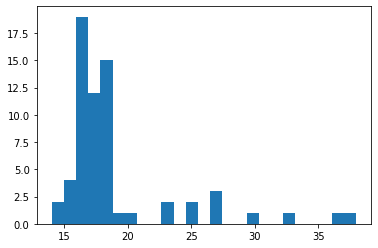

In [56]:
from matplotlib import colors

ages = np.array([person[1] for person in people_labels])
print("Minimum age:", min(ages))
print("Maximum age:", max(ages))

age_range = max(ages) - min(ages)

def ages_to_rgb(ages):
    hues = np.log(ages - min(ages) + 0.1)
    hues = (hues - min(hues)) / (max(hues) - min(hues)) * 0.8 + 0.1
    
    return colors.hsv_to_rgb([(hue, 1, 1) for hue in hues])

plt.hist(ages, bins=(age_range + 1))
color_labels = ages_to_rgb(ages)

6

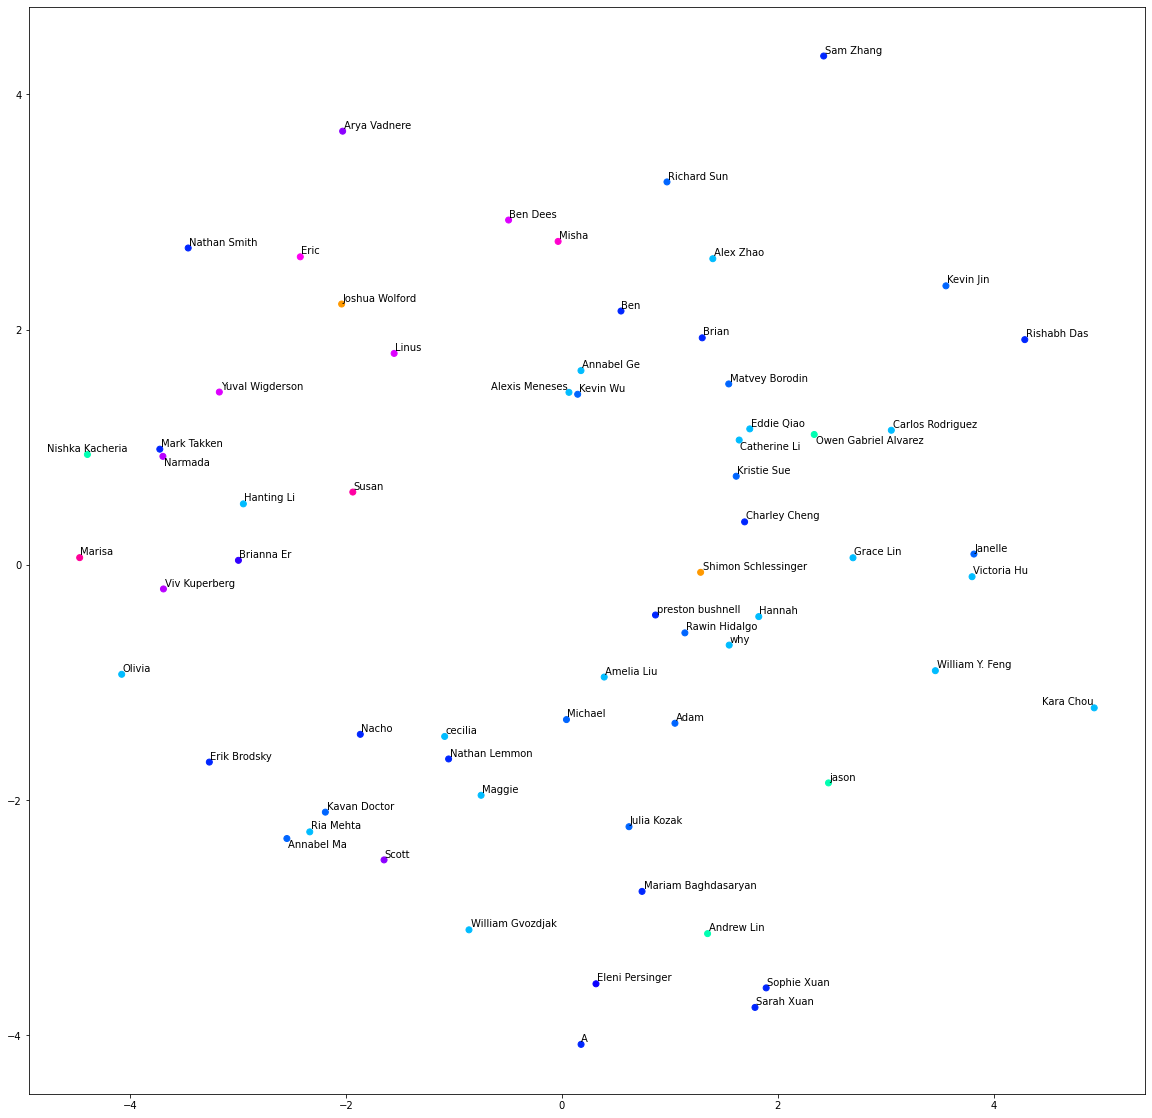

In [58]:
from matplotlib import pyplot as plt
from adjustText import adjust_text

fig = plt.figure(figsize=(20, 20))

#plot_3d = fig.add_subplot(2, 2, 1, projection="3d")
#plot_3d.scatter(*pc_3.T)

plot_2d = fig.add_subplot()
plot_2d.scatter(*pc_2.T, c=color_labels)

labels = []
for person, coords in zip(people_labels, pc_2):
    labels.append(plt.text(coords[0], coords[1], f"{person[0]}", ha="left", va="top"))
    
plt.hsv()

adjust_text(labels)

# Let's find cool correlations

In [ ]:
def correlation(food1, food2):
    idx_1 = food_labels.index(food1)
    idx_2 = food_labels.index(food2)

    x = mat[idx_1]
    y = mat[idx_2]

    plt.scatter(x, y)
    plt.xlabel(food1)
    plt.ylabel(food2)

    #calculate equation for trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    #add trendline to plot
    plt.plot(x, p(x), 'g')


correlation("Chocolate", "Water")